In [1]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime
from os import listdir, walk
from os.path import isfile, join

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid
%matplotlib inline

import seaborn as sns
color = sns.color_palette()

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import KShape, TimeSeriesKMeans
import hdbscan

C:\ProgramData\Anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [31]:
# Load the datasets
current_path = os.getcwd()
#file = os.path.sep.join(['', 'datasets', 'ucr_time_series_data', ''])
#data_train = np.loadtxt(current_path+file+
#                        "ECGFiveDays/ECGFiveDays_TRAIN", 
#                        delimiter=",")

#data_train = np.loadtxt("train.csv",delimiter=",")
#data_train = pd.read_table("ECGFiveDays_TRAIN.tsv",header=None)

data_train = np.loadtxt("ECGFiveDays_TRAIN.tsv")
X_train = to_time_series_dataset(data_train[:,1:])

#X_train = to_time_series_dataset(data_train[:, 1:])
#y_train = data_train[:, 0].astype(np.int)

#data_test = np.loadtxt("test.csv",delimiter=",")
#X_test = to_time_series_dataset(data_test[:, 1:])
#y_test = data_test[:, 0].astype(np.int)

#data_test = np.loadtxt(current_path+file+
#                       "ECGFiveDays/ECGFiveDays_TEST", 
#                       delimiter=",")
#X_test = to_time_series_dataset(data_test[:, 1:])
#y_test = data_test[:, 0].astype(np.int)

In [32]:
X_train = to_time_series_dataset(data_train[:,1:])
X_train = TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X_train)

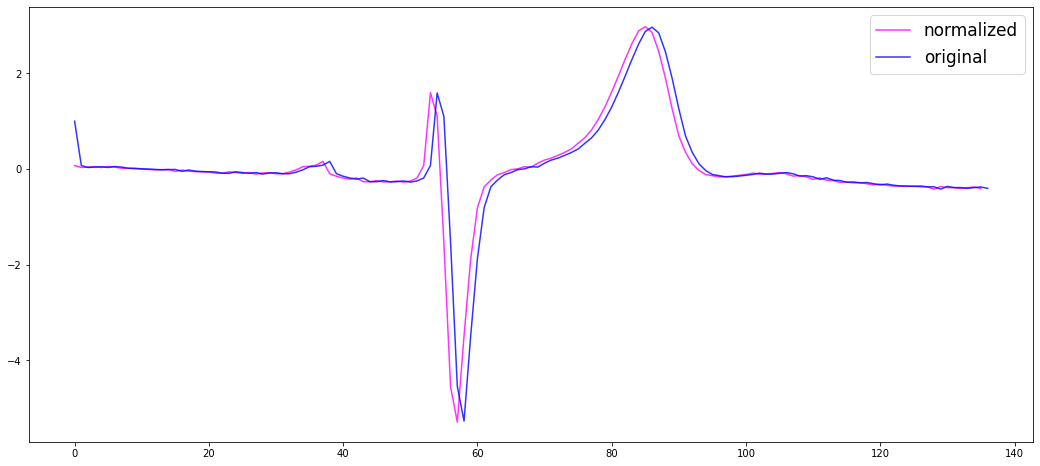

In [34]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
X_train = to_time_series_dataset(data_train[:,1:])
X_train = TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X_train)
plt.figure(figsize=(18, 8))
plt.plot(X_train[1],c='magenta',alpha=0.8,label="normalized")
plt.plot(data_train[1],c='blue',alpha=0.8,label="original")
plt.legend(fontsize=17)

In [36]:
from tslearn.clustering import KShape

ks = KShape(n_clusters=2,max_iter=100,n_init=100,verbose=0)
ks.fit(X_train)

#y_pred = ks.fit_predict(X_train)
#print(y_pred)

ValueError: attempt to get argmin of an empty sequence